<a href="https://colab.research.google.com/github/Hunting-Party10/ML/blob/master/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lecture 2 : Understanding the Dataset

In [0]:
import pandas as pd
import quandl

In [0]:
df = quandl.get('WIKI/GOOGL')

In [0]:
print(df.head(5))

In [0]:
df = df[['Adj. Open','Adj. High','Adj. Low','Adj. Close','Adj. Volume']]

# Lecture 3 : Features and Labels

setting up custom features such as ***high percentage*** and ***percentage change***

In [0]:
df['HL_PCT'] = (df['Adj. High'] - df['Adj. Close'])/df['Adj. Close'] *100

In [0]:
df['PCT_change'] = (df['Adj. Close'] - df['Adj. Open'])/df['Adj. Open'] * 100

In [0]:
df = df[['Adj. Close','HL_PCT','PCT_change','Adj. Volume']]

In [0]:
print(df.head())

In [0]:
forecast_col = 'Adj. Close'
df.fillna(-99999, inplace=True)

In [0]:
import math
forecast_out = int(math.ceil(0.01*len(df)))

In [0]:
df['label'] = df[forecast_col].shift(-forecast_out)

# Lecture 4: Training and Testing

In [0]:
import numpy as np
from sklearn import preprocessing,svm
from sklearn.linear_model import LinearRegression

In [0]:
from sklearn.model_selection import cross_validate

In [0]:
X = np.array(df.drop(['label'],1))
y = np.array(df['label'])

Making the data ***unit gaussian*** ie ***zero mean and unit variance***

In [0]:
X = preprocessing.scale(X)

Splitting data into ***train*** and ***test*** 

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test =train_test_split(X, y, test_size=0.2)

Using simple ***Linear regression*** model

In [0]:
clf = LinearRegression()
clf.fit(X_train,y_train)
accuracy = clf.score(X_test,y_test)

In [38]:
print(accuracy)

0.9789272762919641


In [39]:
print(forecast_out)

35


Makes use of SVM lr model

In [0]:
clf = svm.SVR()
clf.fit(X_train,y_train)
accuracy = clf.score(X_test,y_test)
print(accuracy)

# Lecture 5 : Regression forecasting and predicting

In [0]:
X =X[:-forecast_out]
X_lately = X[-forecast_out:]
df.dropna(inplace= True)

In [43]:
clf = LinearRegression(n_jobs=-1)
clf.fit(X_train,y_train)
accuracy = clf.score(X_test,y_test)
print(accuracy)

0.9789272762919641


Prints out the stock prices for the next 35 days

In [44]:
forecast_set = clf.predict(X_lately)
print(forecast_set, forecast_out)

[1007.9795523  1010.44975696 1009.13114239 1048.02229081 1051.81005547
 1052.00724743 1061.50759163 1062.76096704 1069.83578336 1062.03730528
 1072.51472051 1067.49207577 1064.21352657 1060.4841702  1061.72165776
 1056.2307773  1067.84057258 1054.70872216 1054.52006911 1070.14731958
 1071.95967477 1076.48925651 1091.56515259 1081.87829701 1055.09794869
 1055.17579801 1043.51912133 1029.66729367 1036.36137436 1050.90060731
 1063.7140228  1068.81746785 1071.80800458 1067.07481806 1071.21760902] 35


In [0]:
import datetime
import matplotlib.pyplot as plt
from matplotlib import style

style.use('ggplot')
%matplotlib inline

Getting inital date

In [0]:
df['Forecast'] = np.nan
last_date = df.iloc[-1].name
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day

Date is not a feature of the dataset therefore it need to be added manually

In [0]:
for i in forecast_set:
  next_date = datetime.datetime.fromtimestamp(next_unix)
  next_unix+=one_day
  df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)] + [i]

Plotting our data

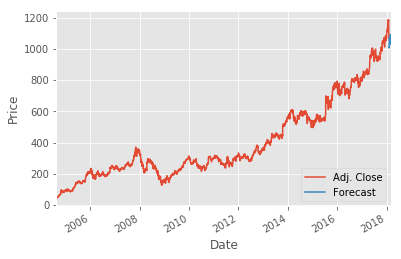

In [48]:
df['Adj. Close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

# Lecture 6: Pickling and Scaling

In [0]:
import pickle
with open()